### 1. Analyse videos with OpneFace

In [1]:
import os
import subprocess
import pandas as pd

base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident3"
emotions = ["happiness", "fear", "surprise", "anger", "disgust", "sadness"]

openface_cmd = "/home/maram/OpenFace/build/bin/FeatureExtraction"

for emotion in emotions:
    emotion_path = os.path.join(base_path, emotion)

    video_file = next((f for f in os.listdir(emotion_path) if f.endswith(".mp4")), None)

    if video_file:
        video_path = os.path.join(emotion_path, video_file)

        cmd = [
            openface_cmd,
            "-verbose",
            "-f", video_path,
            "-out_dir", os.path.join(emotion_path, "OpenFaceOutput")
        ]

        print(f"Processing {emotion}: {video_file}")
        subprocess.run(cmd)

        # Now process the generated CSV
        csv_name = video_file.replace(".mp4", ".csv")
        csv_path = os.path.join(emotion_path, "OpenFaceOutput", csv_name)

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)

            # Select only AU_r columns (AUXX_r)
            au_r_columns = [col for col in df.columns if col.endswith("_r")]

            if au_r_columns:
                # Compute the mean for each AU_r
                au_r_means = df[au_r_columns].mean()

                # Save the means to a CSV
                output_csv_path = os.path.join(emotion_path, f"OpenFace_AU_r_means_{emotion}.csv")
                au_r_means.to_csv(output_csv_path, header=["mean_value"])

                print(f"Saved AU_r mean CSV for {emotion} to {output_csv_path}")
            else:
                print(f"No AU_r columns found in {csv_path}")

        else:
            print(f"CSV not found for {emotion}: {csv_path}")
    else:
        print(f"No video found in {emotion_path}")


Processing happiness: 3-happiness.mp4
Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/maram/OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/maram/OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: /home/maram/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/maram/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat.

### 2. Save results as PNG

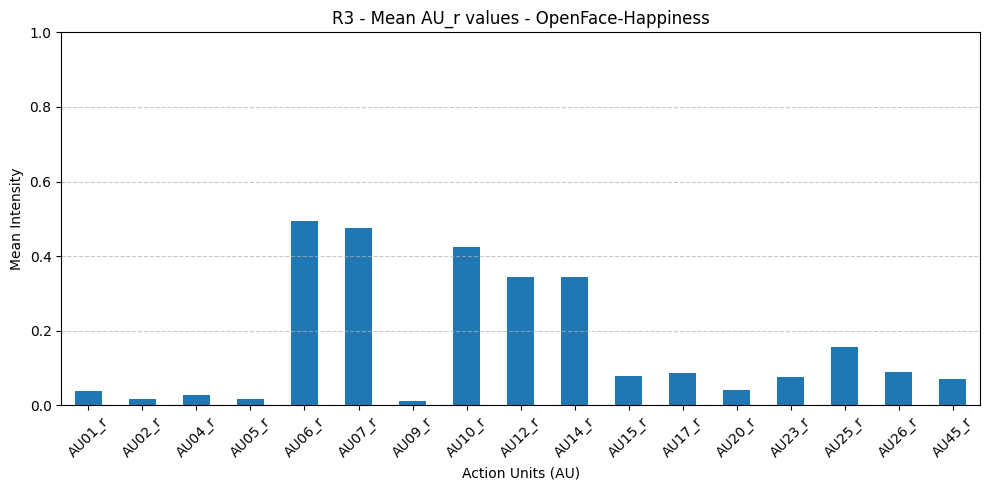

Saved plot for happiness to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/happiness/happiness_OpenFace_au_plot.png


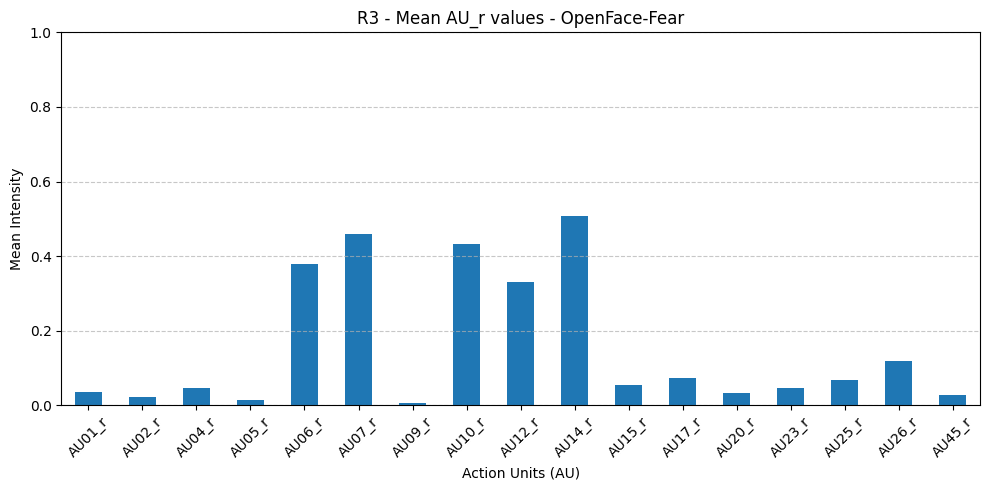

Saved plot for fear to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/fear/fear_OpenFace_au_plot.png


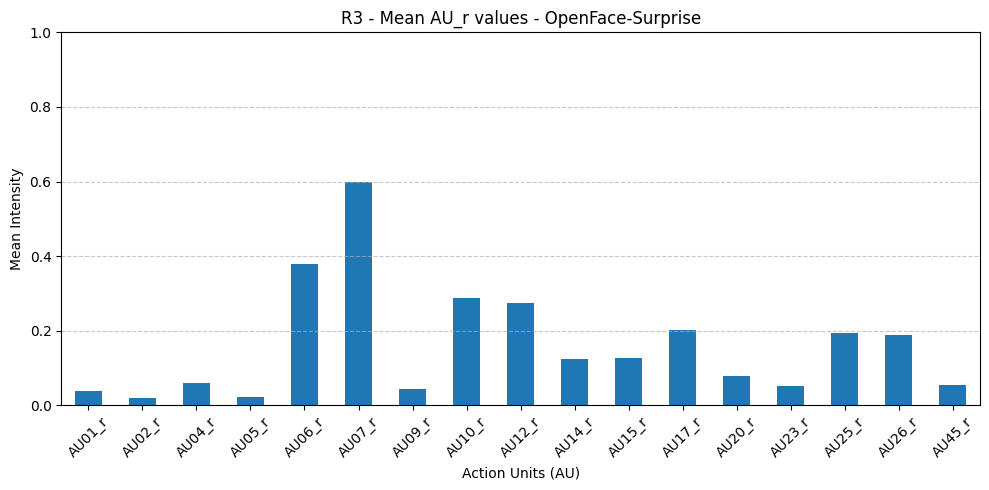

Saved plot for surprise to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/surprise/surprise_OpenFace_au_plot.png


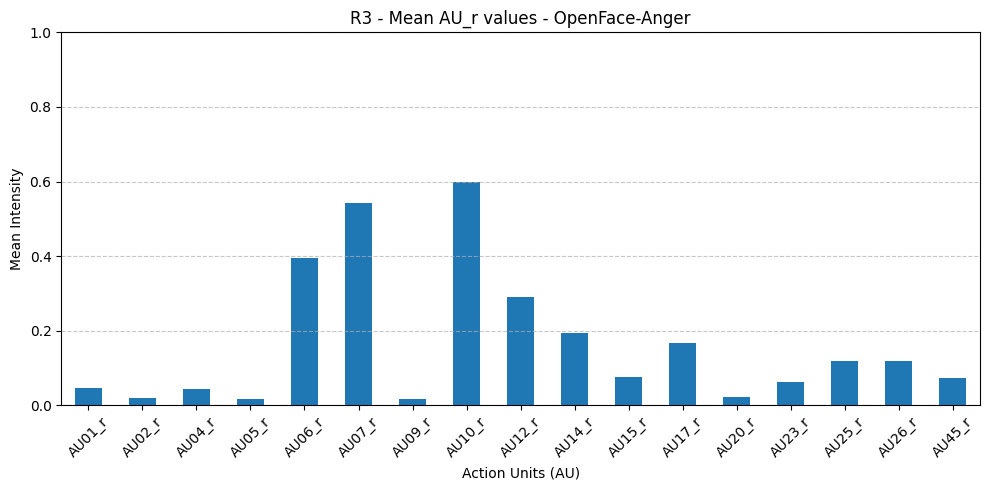

Saved plot for anger to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/anger/anger_OpenFace_au_plot.png


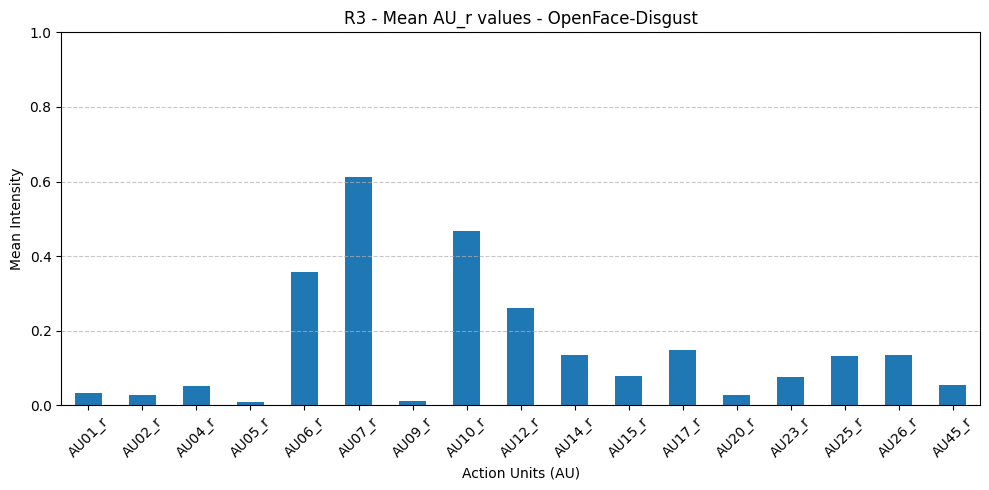

Saved plot for disgust to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/disgust/disgust_OpenFace_au_plot.png


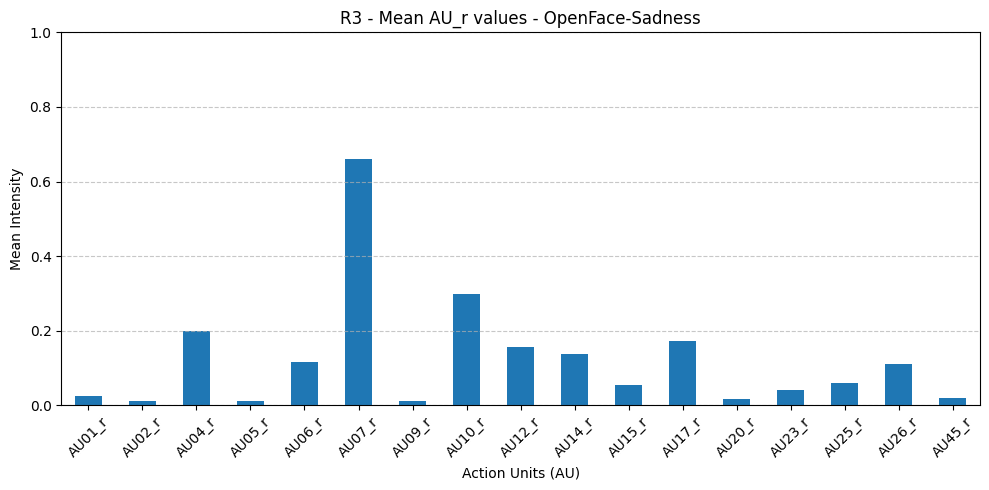

Saved plot for sadness to /home/maram/Downloads/PrendreLaParole/newFPS/resident3/sadness/sadness_OpenFace_au_plot.png


In [2]:
import matplotlib.pyplot as plt

base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident3"
emotions = ["happiness", "fear", "surprise", "anger", "disgust", "sadness"]

for emotion in emotions:
    mean_csv_path = os.path.join(base_path, emotion, f"OpenFace_AU_r_means_{emotion}.csv")

    if os.path.exists(mean_csv_path):
        # Read the mean AU_r CSV
        df = pd.read_csv(mean_csv_path, index_col=0)

        # Plot
        plt.figure(figsize=(10, 5))
        df_normalized = df / 5
        df_normalized["mean_value"].plot(kind="bar")
        plt.title(f"R3 - Mean AU_r values - OpenFace-{emotion.capitalize()}")
        plt.xlabel("Action Units (AU)")
        plt.ylim(0, 1) 
        plt.ylabel("Mean Intensity")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True, axis="y", linestyle="--", alpha=0.7)

        # Save the plot as PNG
        plot_filename = os.path.join(base_path, emotion, f"{emotion}_OpenFace_au_plot.png")
        plt.savefig(plot_filename)
        plt.show()

        print(f"Saved plot for {emotion} to {plot_filename}")
    else:
        print(f"Mean CSV not found for {emotion}: {mean_csv_path}")
